# Introduction to Scikit—Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.
What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##  Getting our data ready to be used with machine learning.

Three main things we have to do.

 1. Split the data into features and labels(usually X and Y)
 2. Filling (also called imputing) or disregarding missing values.
 3. converting non -numerical values to numericak values(also called feature encoding) 

In [6]:
heart_disease = pd.read_csv("heart-disease.csv")

In [7]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# remove  target column
# axis =0 is row
# axis=1 os column
#Column X is data columns or input or feature columns
#column y is target column or output
#“X” are the variables we will use to predict/classify our “y” variable.
X = heart_disease.drop("target", axis =1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# the X is usually denoted in capital letter
# the y is usually denoted in small case 
# https://stats.stackexchange.com/questions/389395/why-uppercase-for-x-and-lowercase-for-y

In [16]:
y = heart_disease["target"]

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## The next thing we have to do is split data into training and test sets.

In [11]:
#The next thing we have to do is split data into training and test sets.

#So in machine learning, one of the most fundamental principles is never evaluate or test your models

#on data that it is learned from, which is why we split it into training and test sets.

In [19]:
# split the data into training and test sets
from sklearn .model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
heart_disease.shape, X.shape, y.shape


((303, 14), (303, 13), (303,))

In [24]:
#total 303 rows, 80% (242)of 303 is used for taining data and 20%(61)for test data.
X_train.shape,  y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

## Convert Categorical data into numbers and create a model

In [30]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [33]:
# create X an y(Price Column)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [34]:
# build Machine Learning Model - this will produce error since data set contains string(Make, Color)
# eg: ValueError: could not convert string to float: 'Toyota'
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [35]:
# Convert Make, Color, doors categorical/String columns to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_name", one_hot, categorical_features)], remainder="passthrough")

transaformed_X = transformer.fit_transform(X)
transaformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
#We chose categorical this time because although Doors is numerical (3, 4, 5), you can think of each of those numbers as a category.

#For example, cars with 3 Doors is a category, cars with 4 Doors is a category and the same for cars with 5 Doors.

#We treat them as categories so the model doesn't think 3 is less than 4 is less than 5 in a numerical sense. E.g. a car with 5 doors might be more than 1 door worth more expensive than a car with 4 doors.

In [36]:
pd.DataFrame(transaformed_X)
# the data in the int format are reained and all other colmns are converted into numbers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


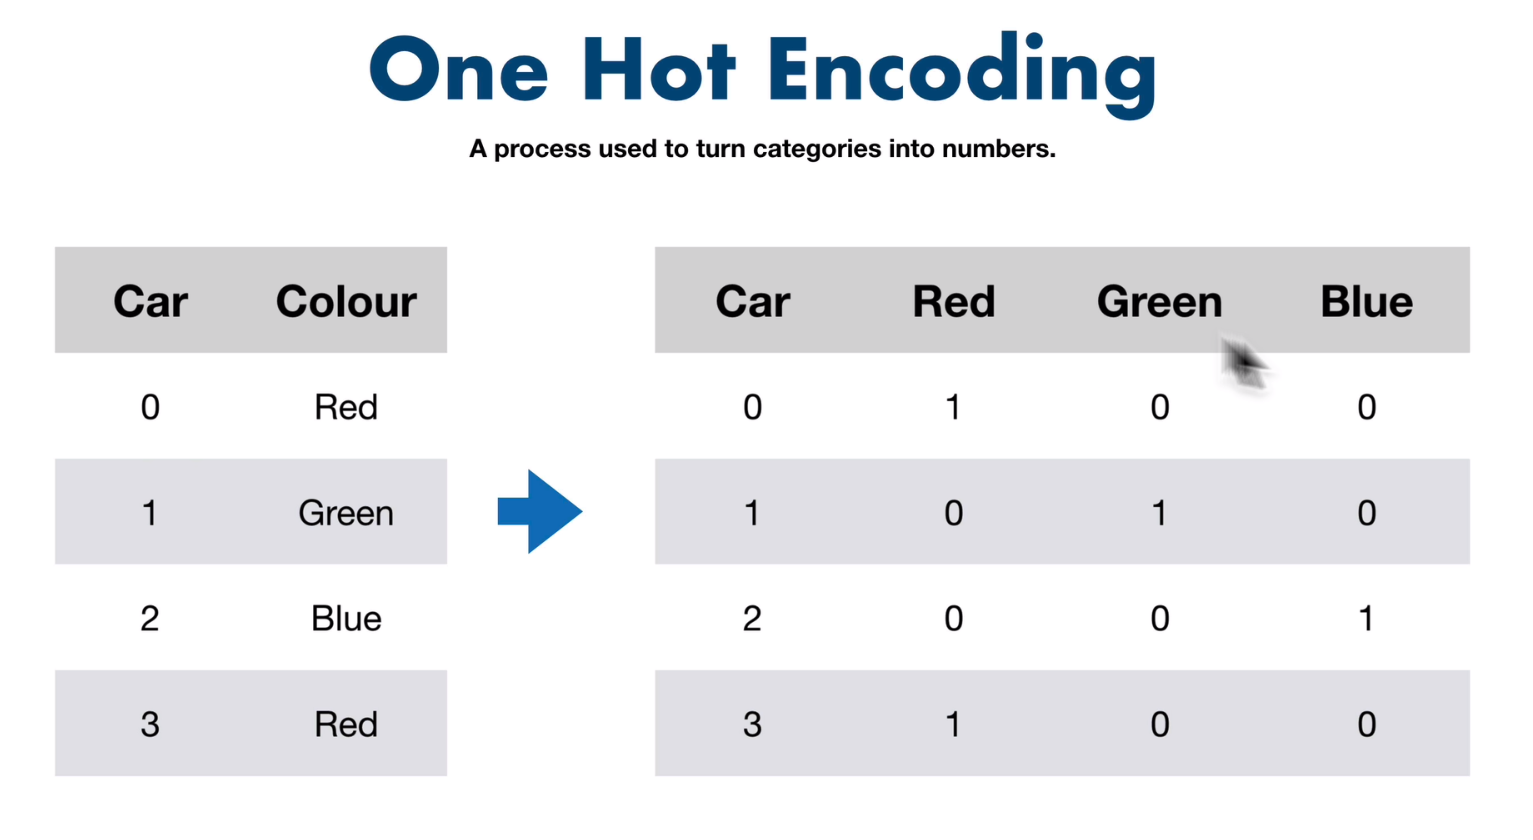

In [37]:
#Let's refit the model
#split into training and test data(20%) using transaformed_X
X_train, X_test, y_train, y_test = train_test_split(transaformed_X, y, test_size=0.2) 

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
model.score(X_test, y_test)

0.3123267902352711